**Question** Créer les deux graphes suivants et désigner leurs matrices d'adjacence (symmétrique) `A_irr`pour le graphe à 5 noeuds et `A_prim` pour l'autre. 

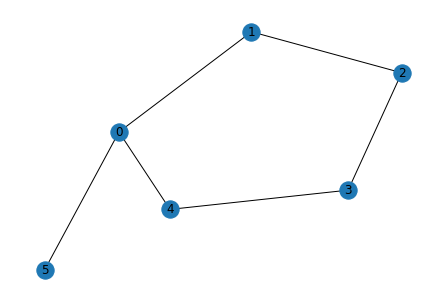

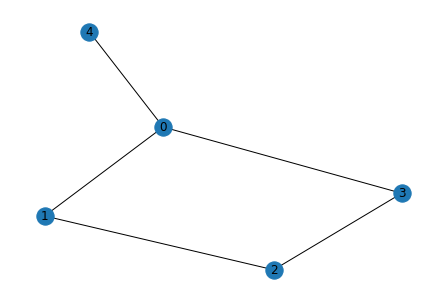

In [1]:
import numpy as np

In [2]:
A_irr = np.array([
    [0, 1, 0, 1, 1], 
    [1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [1, 0, 1, 0, 0],
    [1, 0, 0, 0, 0]])

In [3]:
A_prim = np.array([
    [0, 1, 0, 0, 1, 1], 
    [1, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0],
    [1, 0, 0, 1, 0, 0],
    [1, 0, 0, 0, 0, 0]])

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

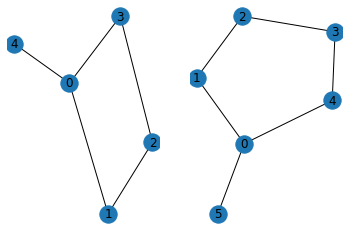

In [5]:
As = {"irr":A_irr, "prim":A_prim}
Gs = dict()
fig, axs = plt.subplots(1, 2)
i = 0
for nA in As:
    Gs[nA] = nx.Graph(As[nA])
    nx.draw(Gs[nA], with_labels=True, ax= axs[i])
    i += 1


# Marche dans le graphe

**Question** Créer un vecteur pour signifier qu'on démarre dans le noeud 0. Appliquer les transitions sur des marches de longueur 3 avec les 2 graphes. 

In [40]:
for A in As.values():
    v = np.zeros(A.shape[0])
    v[0] = 1
    print(v@A)
    print(v@A@A)
    print(v@A@A@A)
    print(v@A@A@A@A)
    print(v@A@A@A@A@A)
    print()

[0. 1. 0. 1. 1.]
[3. 0. 2. 0. 0.]
[0. 5. 0. 5. 3.]
[13.  0. 10.  0.  0.]
[ 0. 23.  0. 23. 13.]

[0. 1. 0. 0. 1. 1.]
[3. 0. 1. 1. 0. 0.]
[0. 4. 1. 1. 4. 3.]
[11.  1.  5.  5.  1.  0.]
[ 2. 16.  6.  6. 16. 11.]



# Spectre

**Question** Calculer les décompositions spectrales des deux graphes. Afficher les vecteurs et valeurs propres.

In [7]:
vals = dict()
vects = dict()
for n,A in As.items():
    vals[n], vects[n] = np.linalg.eig(A)

In [8]:
vals

{'irr': array([-2.13577921,  2.13577921, -0.66215345,  0.66215345,  0.        ]),
 'prim': array([-1.86080585,  2.11490754,  1.        , -0.25410169, -1.61803399,
         0.61803399])}

In [9]:
vects

{'irr': array([[ 5.57345410e-01, -5.57345410e-01,  4.35162146e-01,
          4.35162146e-01,  1.00148357e-32],
        [-4.64705132e-01, -4.64705132e-01,  1.84524092e-01,
         -1.84524092e-01, -7.07106781e-01],
        [ 4.35162146e-01, -4.35162146e-01, -5.57345410e-01,
         -5.57345410e-01,  5.89334563e-32],
        [-4.64705132e-01, -4.64705132e-01,  1.84524092e-01,
         -1.84524092e-01,  7.07106781e-01],
        [-2.60956474e-01, -2.60956474e-01, -6.57192300e-01,
          6.57192300e-01,  3.05594581e-17]]),
 'prim': array([[-6.63504341e-01,  5.22966014e-01,  5.00000000e-01,
         -1.90443004e-01, -1.24333563e-17, -1.93796184e-17],
        [ 4.39042241e-01,  4.29374351e-01, -3.60954292e-17,
         -3.50541834e-01, -3.71748034e-01,  6.01500955e-01],
        [-1.53468031e-01,  3.85121039e-01, -5.00000000e-01,
          2.79516276e-01,  6.01500955e-01,  3.71748034e-01],
        [-1.53468031e-01,  3.85121039e-01, -5.00000000e-01,
          2.79516276e-01, -6.01500955e-0

**Question** Vérifier que $Av = \lambda v$ pour le premier couple valeur et vecteur propre, et les autres...

In [10]:
for n in As:
    print(n)
    print(As[n]@vects[n][:, 0])
    print(vals[n][0] * vects[n][:, 0]) 

irr
[-1.19036674  0.99250756 -0.92941026  0.99250756  0.55734541]
[-1.19036674  0.99250756 -0.92941026  0.99250756  0.55734541]
prim
[ 1.23465276 -0.81697237  0.28557421  0.28557421 -0.81697237 -0.66350434]
[ 1.23465276 -0.81697237  0.28557421  0.28557421 -0.81697237 -0.66350434]


In [11]:
for n in As:
    print(n)
    A, B = As[n]@vects[n],vals[n]*vects[n] 
    print(A)
    print(B)
    print(np.allclose(A,B))

irr
[[-1.19036674e+00 -1.19036674e+00 -2.88144115e-01  2.88144115e-01
  -3.02507449e-16]
 [ 9.92507557e-01 -9.92507557e-01 -1.22183264e-01 -1.22183264e-01
   6.89482920e-32]
 [-9.29410263e-01 -9.29410263e-01  3.69048184e-01 -3.69048184e-01
  -3.33066907e-16]
 [ 9.92507557e-01 -9.92507557e-01 -1.22183264e-01 -1.22183264e-01
   6.89482920e-32]
 [ 5.57345410e-01 -5.57345410e-01  4.35162146e-01  4.35162146e-01
   1.00148357e-32]]
[[-1.19036674 -1.19036674 -0.28814412  0.28814412  0.        ]
 [ 0.99250756 -0.99250756 -0.12218326 -0.12218326 -0.        ]
 [-0.92941026 -0.92941026  0.36904818 -0.36904818  0.        ]
 [ 0.99250756 -0.99250756 -0.12218326 -0.12218326  0.        ]
 [ 0.55734541 -0.55734541  0.43516215  0.43516215  0.        ]]
True
prim
[[ 1.23465276e+00  1.10602477e+00  5.00000000e-01  4.83918889e-02
   3.67716932e-17  2.92877713e-17]
 [-8.16972372e-01  9.08087053e-01  2.22044605e-16  8.90732718e-02
   6.01500955e-01  3.71748034e-01]
 [ 2.85574210e-01  8.14495390e-01 -5.00000

**Question** Vérifier que les vecteurs propres sont orthogonaux entre eux et ont une norme 2 égale à 1. 

In [12]:
for n, A in As.items():
    for i in range(A.shape[0]-1):
        print("norme v_{}:".format(i) ,np.linalg.norm(vects[n][:,i]))
        for j in range(i+1, A.shape[0]):
            print("produit scalaire <v_{},v_{}>".format(i,j),vects[n][:,i]@vects[n][:,j])

norme v_0: 1.0
produit scalaire <v_0,v_1> -4.996003610813204e-16
produit scalaire <v_0,v_2> -2.7755575615628914e-16
produit scalaire <v_0,v_3> -1.3877787807814457e-16
produit scalaire <v_0,v_4> 1.0304761402408182e-16
norme v_1: 1.0
produit scalaire <v_1,v_2> 1.942890293094024e-16
produit scalaire <v_1,v_3> 3.3306690738754696e-16
produit scalaire <v_1,v_4> -7.974688438433891e-18
norme v_2: 0.9999999999999999
produit scalaire <v_2,v_3> 4.440892098500626e-16
produit scalaire <v_2,v_4> 6.318328627266519e-17
norme v_3: 1.0
produit scalaire <v_3,v_4> -3.5427710657036334e-17
norme v_0: 0.9999999999999999
produit scalaire <v_0,v_1> 4.718447854656915e-16
produit scalaire <v_0,v_2> 6.938893903907228e-17
produit scalaire <v_0,v_3> -1.6653345369377348e-16
produit scalaire <v_0,v_4> -5.551115123125783e-17
produit scalaire <v_0,v_5> -5.551115123125783e-17
norme v_1: 1.0
produit scalaire <v_1,v_2> 2.7755575615628914e-17
produit scalaire <v_1,v_3> -2.636779683484747e-16
produit scalaire <v_1,v_4> -5.5

# A_irr est irréductible mais pas primitive

**Question** Vérifier que `A_irr` n'est pas primitive mais que `A_prim` l'est.

In [13]:
As['irr']

array([[0, 1, 0, 1, 1],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0]])

In [14]:
As['irr']@As['irr']

array([[3, 0, 2, 0, 0],
       [0, 2, 0, 2, 1],
       [2, 0, 2, 0, 0],
       [0, 2, 0, 2, 1],
       [0, 1, 0, 1, 1]])

In [15]:
As['irr']@As['irr']@As['irr']

array([[0, 5, 0, 5, 3],
       [5, 0, 4, 0, 0],
       [0, 4, 0, 4, 2],
       [5, 0, 4, 0, 0],
       [3, 0, 2, 0, 0]])

In [16]:
R = As['irr']
for _ in range(6):
    R = R@As['irr']
    print(R[1])

[0 2 0 2 1]
[5 0 4 0 0]
[0 9 0 9 5]
[23  0 18  0  0]
[ 0 41  0 41 23]
[105   0  82   0   0]


In [17]:
R = As['prim']
for _ in range(6):
    R = R@As['prim']
    print(R)

[[3 0 1 1 0 0]
 [0 2 0 1 1 1]
 [1 0 2 0 1 0]
 [1 1 0 2 0 0]
 [0 1 1 0 2 1]
 [0 1 0 0 1 1]]
[[0 4 1 1 4 3]
 [4 0 3 1 1 0]
 [1 3 0 3 1 1]
 [1 1 3 0 3 1]
 [4 1 1 3 0 0]
 [3 0 1 1 0 0]]
[[11  1  5  5  1  0]
 [ 1  7  1  4  5  4]
 [ 5  1  6  1  4  1]
 [ 5  4  1  6  1  1]
 [ 1  5  4  1  7  4]
 [ 0  4  1  1  4  3]]
[[ 2 16  6  6 16 11]
 [16  2 11  6  5  1]
 [ 6 11  2 10  6  5]
 [ 6  6 10  2 11  5]
 [16  5  6 11  2  1]
 [11  1  5  5  1  0]]
[[43  8 22 22  8  2]
 [ 8 27  8 16 22 16]
 [22  8 21  8 16  6]
 [22 16  8 21  8  6]
 [ 8 22 16  8 27 16]
 [ 2 16  6  6 16 11]]
[[18 65 30 30 65 43]
 [65 16 43 30 24  8]
 [30 43 16 37 30 22]
 [30 30 37 16 43 22]
 [65 24 30 43 16  8]
 [43  8 22 22  8  2]]


# Rayon spectral

**Question** Calculer le rayon spectral des deux graphes

In [18]:
ind_max = dict()
rayons = dict()
for n in As:
    ind_max[n] = np.argmax(np.abs(vals[n]))
    rayons[n] = vals[n][ind_max[n]]
print(rayons)
print(ind_max)

{'irr': 2.1357792050698556, 'prim': 2.114907541476756}
{'irr': 1, 'prim': 1}


In [19]:
np.linalg.norm(vects['prim'][:, ind_max['prim']],1)

2.3992328588189227

**Question** La valeur propre maximale en valeur absolue est-elle unique dans les 2 cas ?

In [20]:
np.abs(vals['irr'])

array([2.13577921, 2.13577921, 0.66215345, 0.66215345, 0.        ])

**Question** Pour la matrice primitive, calculer le vecteur  de Perron-Frobenius, ie le vecteur associé à cette valeur propre maximale et normalisé.

In [21]:
x = vects['prim'][:, ind_max['prim']] / np.abs(vects['prim'][:, ind_max['prim']]).sum()
print(x)
print(np.linalg.norm(x, 1))

[0.21797218 0.17896318 0.16051841 0.16051841 0.17896318 0.10306464]
0.9999999999999999


**Question** Vérifier que ce vecteur correspond bien à un vecteur propre de valeur propre ce rayon spectral comme indiqué dans le théorème.

In [22]:
np.allclose(As['prim']@x, rayons['prim']*x)

True

**Question** Pour la matrice irreductible, calculer les vecteurs propres correspondant au rayon spectral normalisés (la norme 1 doit être égale à 1). Est-ce que ce sont des vecteurs positifs?  Calculer ensuite les vecteurs dont les composantes sont les valeurs absolues de ces vecteurs. Est-ce unique ? Est-ce un vecteur propre ? 

In [23]:
x1 = vects['irr'][:, 0] / np.abs(vects['irr'][:, 0]).sum()
x2 = vects['irr'][:, 1] / np.abs(vects['irr'][:, 1]).sum()
x3 = np.abs(x2)
print(x1)
print(x2)
print(x3)

[ 0.25532639 -0.2128868   0.19935282 -0.2128868  -0.11954718]
[-0.25532639 -0.2128868  -0.19935282 -0.2128868  -0.11954718]
[0.25532639 0.2128868  0.19935282 0.2128868  0.11954718]


In [24]:
np.linalg.norm(x1, 1), np.linalg.norm(x2, 1), np.linalg.norm(x3, 1), 

(1.0, 1.0, 1.0)

In [25]:
print(np.allclose(As['irr']@x3, rayons['irr']*x3))


True


# Matrices stochastiques

Chaque ligne est un vecteur de probabilité. $P_{ij}$ est la probabilité d'aller en $j$ si on est en $i$, $P(X_{n+1}=j\mid X_n = i)$. Donc chaque ligne somme à 1.

**Question** Calculer les matrices stochastiques associées aux matrices précédentes.

In [47]:
Ps = dict()
for n in As:
    Ps[n] = As[n]/As[n].sum(axis=1)[:, np.newaxis]


In [48]:
Ps['irr']

array([[0.        , 0.33333333, 0.        , 0.33333333, 0.33333333],
       [0.5       , 0.        , 0.5       , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       , 0.        ],
       [0.5       , 0.        , 0.5       , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ]])

**Question** Vérifier que les lignes somment à 1

In [28]:
for n in As:
    print(n, Ps[n].sum(axis=1))

irr [1. 1. 1. 1. 1.]
prim [1. 1. 1. 1. 1. 1.]


**Attention** : la matrice n'est plus symétrique. Si on est en $i$ avec une certaine probabilité $p_i$ alors arriver en $j$ sera $p_i\times P_{ij}$. Donc si on a un vecteur $p$ qui donne les probabilités d'être dans chacun des noeuds, la probabilité d'aller dans $j$ sera $\sum_i p_i \times P_{ij}$, c'est à dire la $p^\top P_{:j}$.

On va chercher la probabilité stationnaire $\pi$ qui vérifie $\pi_j = \sum_i \pi_i \times P_{ij}$, c'est-à-dire $\pi^\top P=\pi^\top$. On va appliquer le théorème de Perron-Frobenius. Avec cette organisation de la matrice et des produits, c'est sur la matrice transposée qu'il faut travailler la décomposition spectrale...

**Question** Calculer leur décomposition spectrale et vérifier s'il n'y a qu'une valeur propre maximale en valeur absolue... Quel est le rayon spectral ? 

In [29]:
valsP = dict()
vectP = dict()
for n, P in Ps.items():
    valsP[n], vectP[n] = np.linalg.eig(P.T)
    print(n, np.abs(valsP[n]))

irr [1.         0.40824829 1.         0.40824829 0.        ]
prim [1.         0.54502505 0.17592751 0.86909754 0.80901699 0.30901699]


Le rayon spectral est 1 dans les 2 cas.

**Question** Calculer le vecteur de probabilités associé : on prend les valeurs absolues et on normalise par la norme 1. 

In [30]:
probs = dict()
for n in Ps:
    ind = np.argmax(np.abs(valsP[n]))
    v = np.abs(vectP[n][:,ind])
    probs[n] = v/v.sum()

In [31]:
probs

{'irr': array([0.3, 0.2, 0.2, 0.2, 0.1]),
 'prim': array([0.25      , 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.08333333])}

**Question** Vérifier que l'on a bien l'égalité donnée dans le théorème et donc on a bien trouvé ce vecteur de Perron-Frobenius.

In [32]:
for n, P in Ps.items():
    print(probs[n]@P, probs[n])

[0.3 0.2 0.2 0.2 0.1] [0.3 0.2 0.2 0.2 0.1]
[0.25       0.16666667 0.16666667 0.16666667 0.16666667 0.08333333] [0.25       0.16666667 0.16666667 0.16666667 0.16666667 0.08333333]


# Avec les itérés de P

**Question** Calculer $P^{50}$, $P^{51}$, $P^{52}$ et pour les matrices stochastiques $P$ associées aux deux graphes. Appelez `M` les matrices $P^{50}$.

In [33]:
Ms = dict()
for n, P in Ps.items(): 
    print('-'*50, n, '-'*50)
    Ms[n] = P
    for _ in range(50):
        Ms[n] = Ms[n]@P
    print(Ms[n])
    print(Ms[n]@P)
    print(Ms[n]@P@P)

-------------------------------------------------- irr --------------------------------------------------
[[0.  0.4 0.  0.4 0.2]
 [0.6 0.  0.4 0.  0. ]
 [0.  0.4 0.  0.4 0.2]
 [0.6 0.  0.4 0.  0. ]
 [0.6 0.  0.4 0.  0. ]]
[[0.6 0.  0.4 0.  0. ]
 [0.  0.4 0.  0.4 0.2]
 [0.6 0.  0.4 0.  0. ]
 [0.  0.4 0.  0.4 0.2]
 [0.  0.4 0.  0.4 0.2]]
[[0.  0.4 0.  0.4 0.2]
 [0.6 0.  0.4 0.  0. ]
 [0.  0.4 0.  0.4 0.2]
 [0.6 0.  0.4 0.  0. ]
 [0.6 0.  0.4 0.  0. ]]
-------------------------------------------------- prim --------------------------------------------------
[[0.24965192 0.16683568 0.16660494 0.16660494 0.16683568 0.08346683]
 [0.25025352 0.16654077 0.16671614 0.1667071  0.16654636 0.0832361 ]
 [0.24990741 0.16671614 0.16664293 0.16665757 0.1667071  0.08336884]
 [0.24990741 0.1667071  0.16665757 0.16664293 0.16671614 0.08336884]
 [0.25025352 0.16654636 0.1667071  0.16671614 0.16654077 0.0832361 ]
 [0.2504005  0.1664722  0.16673769 0.16673769 0.1664722  0.08317972]]
[[0.25030251 0.16651978 

**Question** Que constatez-vous?

*Réponse* : On converge avec la matrice primitive, mais on alterne avec l'autre.

**Question** Vérifier que si on applique le M associé à la matrice primitive sur un vecteur de proba initiale aléatoire, on retrouve le vecteur de Perron, la distribution stationnaire.

In [34]:
v0 = np.random.rand(Ps['prim'].shape[0])
v0 = v0 / np.sum(v0)

In [35]:
v0@Ms['prim']

array([0.25005318, 0.166642  , 0.16667423, 0.16667797, 0.16663969,
       0.08331294])

In [36]:
probs['prim']

array([0.25      , 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.08333333])

Si P est irreductible, on recommence la même chose... Itération 50 fois dans RP

**Question** Pour la matrice irreductible, vérifier qu'on a tout de même la convergence en moyenne : la somme des premiers itérés divisée par le nombre d'itérations.

In [37]:
n = 100
P = Ps['irr']
RP = P
SRP = P
for _ in range(n):
    RP = RP@P
    SRP = SRP + RP  # Attention += n'a pas la même sémantique
print(SRP/n) 

[[0.3008 0.2032 0.1992 0.2032 0.1036]
 [0.3048 0.2002 0.2052 0.2002 0.0996]
 [0.2988 0.2052 0.2012 0.2052 0.0996]
 [0.3048 0.2002 0.2052 0.2002 0.0996]
 [0.3108 0.1992 0.1992 0.1992 0.1016]]


**Question** Transformez la matrice irrégulière avec un damping factor de .85. Vérifiez que la matrice est primitive...

In [38]:
Ps['new'] = .85*Ps['irr'] + 0.15/5

In [39]:
Ps['new'].sum(axis=1)

array([1., 1., 1., 1., 1.])